In [1]:
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import random
from config import api_key
# from citipy import citipy
import pprint as pp
import json

In [2]:
city_csv = pd.read_csv('C:/Users/briv1/OneDrive/Documents/GitHub/API_Homework/worldcitiespop.csv')
# city_csv.dtypes

C:\Users\briv1\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
city_df = pd.DataFrame.dropna(city_csv)
(len(city_df))

47979

In [20]:
new_city_df = city_df.drop(city_df[city_df['Population'] <= 2000000].index).sample(30)
(len(new_city_df))

30

In [21]:
simple_city_df = new_city_df.drop(['Country','AccentCity', 'Region'], axis=1)
simple_city_df.head()

,City,Population,Latitude,Longitude
2707212,bangkok,5104475.0,13.753979,100.501444
1538335,nagoya,2191291.0,35.180198,136.906739
593628,tangshan,2054526.0,37.332500,114.701389
842667,cairo,7734602.0,30.050000,31.250000
2657056,mogadishu,2590180.0,2.066667,45.366667


In [22]:
simple_city_df['Temperature (F)'] = ''
simple_city_df['Humidity (%)'] = ''
simple_city_df['Cloudiness (%)'] = ''
simple_city_df['Wind Speed (mph)'] = ''
simple_city_df.head()

,City,Population,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
2707212,bangkok,5104475.0,13.753979,100.501444,,,,
1538335,nagoya,2191291.0,35.180198,136.906739,,,,
593628,tangshan,2054526.0,37.332500,114.701389,,,,
842667,cairo,7734602.0,30.050000,31.250000,,,,
2657056,mogadishu,2590180.0,2.066667,45.366667,,,,


In [23]:
one_city_name = 'medellin'
sample_url = (f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q={one_city_name}')
sample_response = requests.get(sample_url).json()
sample_string = json.dumps(sample_response)
parsed_json = json.loads(sample_string)
print(pp.pprint(parsed_json))
# print(parsed_json['main']['temp'])
# simple_city_df.loc[index,'Temperature (F)'] = parsed_json['main']['temp']
# simple_city_df.head()

{'cod': '404', 'message': 'city not found'}
None


In [24]:
for index, row in simple_city_df.iterrows():
    try:
        city_name = (row[0])
        base_url = (f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q={city_name}')
        response = requests.get(base_url).json()
        json_string = json.dumps(response)
        parsed_json = json.loads(json_string)

        for results in parsed_json:

            simple_city_df.loc[index,'Temperature (F)'] = parsed_json['main']['temp']
            simple_city_df.loc[index,'Humidity (%)'] = parsed_json['main']['humidity']
            simple_city_df.loc[index,'Cloudiness (%)'] = parsed_json['clouds']['all']
            simple_city_df.loc[index,'Wind Speed (mph)'] = parsed_json['wind']['speed']
        
        print(city_name)
        print(index)
        print(parsed_json['main']['temp'])
        print(parsed_json['main']['humidity'])
        print(parsed_json['clouds']['all'])
        print(parsed_json['wind']['speed'])
        print('--------------')
    except:
        print(f'response error for city: {city_name}')

bangkok
2707212
84.09
70
20
9.17
--------------
nagoya
1538335
64.69
83
0
6.93
--------------
tangshan
593628
70.32
69
100
12.1
--------------
cairo
842667
73.2
60
0
13.87
--------------
mogadishu
2657056
79.68
83
0
13.02
--------------
izmir
2800665
61.18
72
0
2.24
--------------
harare
3173019
55.4
62
0
8.05
--------------
ho chi minh city
3090599
80.6
94
40
4.7
--------------
durban
3125889
57.31
93
90
12.75
--------------
taiyuan
591861
71.6
56
0
6.71
--------------
kanpur
1339286
82.4
42
0
2.24
--------------
abidjan
390670
82.4
83
40
11.41
--------------
harbin
480266
57.2
62
0
6.71
--------------
toronto
351416
66.13
93
20
13.87
--------------
montreal
349487
61.99
67
90
12.75
--------------
madras
1344273
60.44
41
40
6.93
--------------
hyderabad
1336412
86
45
40
6.93
--------------
sydney
159856
57.94
58
0
8.05
--------------
changchun
433555
66.2
20
0
11.18
--------------
seoul
1626528
60.49
87
75
1.12
--------------
aleppo
2665396
64.2
54
0
7.2
--------------
xian
618174
58.

In [25]:
simple_city_df

,City,Population,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
2707212,bangkok,5104475.0,13.753979,100.501444,84.09,70,20,9.17
1538335,nagoya,2191291.0,35.180198,136.906739,64.69,83,0,6.93
593628,tangshan,2054526.0,37.332500,114.701389,70.32,69,100,12.1
842667,cairo,7734602.0,30.050000,31.250000,73.2,60,0,13.87
2657056,mogadishu,2590180.0,2.066667,45.366667,79.68,83,0,13.02
2800665,izmir,2501895.0,38.412726,27.138376,61.18,72,0,2.24
3173019,harare,2213701.0,-17.817778,31.044722,55.4,62,0,8.05
3090599,ho chi minh city,3467426.0,10.750000,106.666667,80.6,94,40,4.7
3125889,durban,3120340.0,-29.857896,31.029198,57.31,93,90,12.75
591861,taiyuan,2722475.0,37.726944,112.470833,71.6,56,0,6.71


Text(0, 0.5, 'Temperature in Fahrenheit')

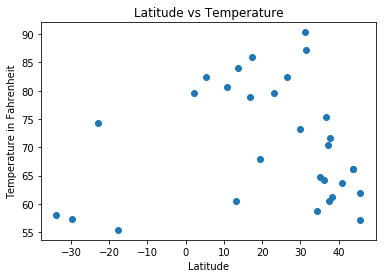

In [26]:
plt.scatter(simple_city_df.Latitude, simple_city_df['Temperature (F)'])
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature in Fahrenheit')

Text(0, 0.5, 'Percentage of Humidity')

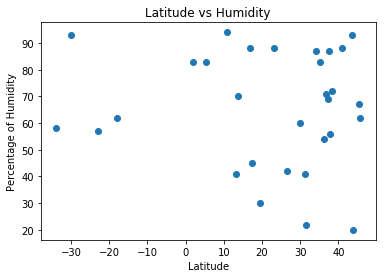

In [27]:
plt.scatter(simple_city_df.Latitude, simple_city_df['Humidity (%)'])
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Percentage of Humidity')

Text(0, 0.5, 'Percentage of Cloudiness')

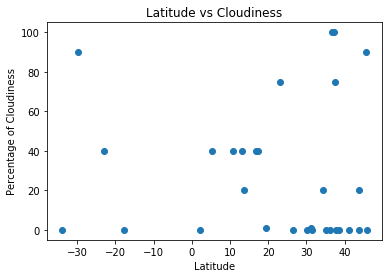

In [28]:
plt.scatter(simple_city_df.Latitude, simple_city_df['Cloudiness (%)'])
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Percentage of Cloudiness')

Text(0, 0.5, 'Wind Speed in MPH')

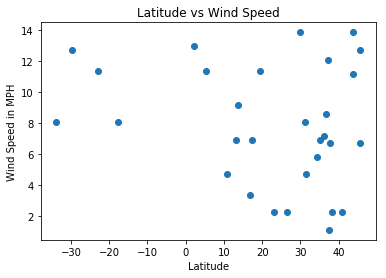

In [29]:
plt.scatter(simple_city_df.Latitude, simple_city_df['Wind Speed (mph)'])
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in MPH')